#1. 이미지 전처리

0. Caltech101 이미지 데이터: https://www.vision.caltech.edu/Image_Datasets/Caltech101/Caltech101.html

1. content의 caltech의 zip파일을 압축을 해제
- !unzip 파일이름.zip
2. 각 폴더에 있는 이미지들을 읽으셔서 크기를 50,50으로 resize하셔서, 모두 png 파일로 저장해주세요
 - 파일이름은 폴더이름_resized_일련번호.png

In [2]:
import os
if not os.path.exists("caltech"):
  os.mkdir("caltech")
os.chdir("/content/caltech")
if not os.path.exists("result"):
  os.makedirs("result")

In [3]:
!unzip 101_ObjectCategories.zip

Archive:  101_ObjectCategories.zip
  inflating: flamingo/image_0001.jpg  
  inflating: flamingo/image_0002.jpg  
  inflating: flamingo/image_0003.jpg  
  inflating: flamingo/image_0004.jpg  
  inflating: flamingo/image_0005.jpg  
  inflating: flamingo/image_0006.jpg  
  inflating: flamingo/image_0007.jpg  
  inflating: flamingo/image_0008.jpg  
  inflating: flamingo/image_0009.jpg  
  inflating: flamingo/image_0010.jpg  
  inflating: flamingo/image_0011.jpg  
  inflating: flamingo/image_0012.jpg  
  inflating: flamingo/image_0013.jpg  
  inflating: flamingo/image_0014.jpg  
  inflating: flamingo/image_0015.jpg  
  inflating: flamingo/image_0016.jpg  
  inflating: flamingo/image_0017.jpg  
  inflating: flamingo/image_0018.jpg  
  inflating: flamingo/image_0019.jpg  
  inflating: flamingo/image_0020.jpg  
  inflating: flamingo/image_0021.jpg  
  inflating: flamingo/image_0022.jpg  
  inflating: flamingo/image_0023.jpg  
  inflating: flamingo/image_0024.jpg  
  inflating: flamingo/image_0

In [4]:
categories = [ i for i in os.listdir() if ( not (i.endswith(".zip")) ) & (i != 'result') & (not ( i.endswith(".ipynb_checkpoints")))]
categories

['chair', 'butterfly', 'flamingo', 'caltech', 'elephant', 'camera']

In [5]:
#/content/caltech/result 폴더에 저장하기
from PIL import Image
for i in categories:
  files = os.listdir( i )
  q=1
  for j in files:
    img = Image.open(i+"/"+j)
    img.resize( (50, 50) )
    img.save("result/"+i+"_resized_"+str(q)+".jpg")
    q=q+1

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split

os.chdir("/content/caltech")
#대상 카테고리
nb_classes = len(categories)

#image size
image_w=50
image_h=50
pixels = image_w * image_h * 3

#read
X=[]
Y=[]
categories

['chair', 'butterfly', 'flamingo', 'caltech', 'elephant', 'camera']

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
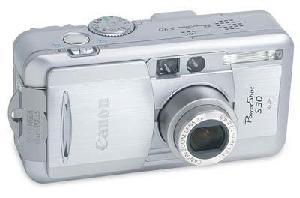

In [7]:
np.array(img)

In [8]:
import glob

os.chdir("/content")

for idx, cat in enumerate( categories):

  #label
  label=[0 for i in range(nb_classes)]
  label[idx]=1

  #image
  image_dir="caltech/"+cat
  files = glob.glob(image_dir+"/*.jpg") #현재 또는 주어진 디렉토리의 특정 확장자의 파일 선택
  print(image_dir)

  for i, f in enumerate(files):
    img = Image.open(f)
    img = img.convert("RGB")
    img = img.resize((image_w, image_h))
    data=np.array(img)
    X.append(data)
    Y.append(label)
    if i%10 ==0:
      print(i, "\n", data)

X=np.array(X)
Y=np.array(Y)

print(X.shape)

#partition
X_train, X_test, y_train, y_test = train_test_split( X,Y)

caltech/chair
0 
 [[[214 211 202]
  [212 208 202]
  [209 205 202]
  ...
  [130 126 125]
  [122 118 116]
  [112 108 107]]

 [[217 211 203]
  [214 207 202]
  [218 211 208]
  ...
  [187 182 184]
  [183 179 180]
  [172 168 170]]

 [[213 205 200]
  [209 200 195]
  [216 205 204]
  ...
  [211 206 212]
  [211 206 211]
  [209 204 210]]

 ...

 [[158 151 148]
  [148 144 139]
  [140 136 138]
  ...
  [168 178 179]
  [163 173 174]
  [162 172 173]]

 [[150 143 147]
  [159 151 153]
  [154 152 150]
  ...
  [169 176 179]
  [165 172 175]
  [162 169 172]]

 [[158 152 157]
  [161 151 156]
  [157 155 155]
  ...
  [170 173 177]
  [171 174 177]
  [173 176 180]]]
10 
 [[[181 181 181]
  [211 211 211]
  [210 210 210]
  ...
  [210 210 210]
  [212 212 212]
  [152 152 152]]

 [[224 224 224]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [186 186 186]]

 [[222 222 222]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [184 184 184]]

 ...

 [[222 222 222]
  [255 255 25

In [12]:
X_train_new = X_train.reshape(-1, 750)
X_test_new = X_test.reshape(-1, 750)

- opencv 활용

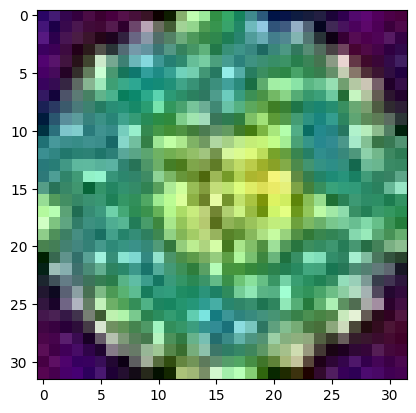

In [90]:
import cv2
import numpy as np

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('641447.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기

In [93]:
im.shape

(32, 32, 3)

- wafer 이미지 처리

In [ ]:
!unzip Dataset.zip

In [39]:
import numpy as np
from PIL import Image
import os, glob, random

max_photo = 150
photo_size=32

In [20]:
import os
import glob
import random
dirs = os.listdir("Dataset")

In [42]:
def img_read(dir):
  files = glob.glob( "Dataset/"+dir+"/*.jpg")
  #random.shuffle(files)
  num=0
  tmp1 = []
  tmp2 = []
  print(len(files), dir, num)
  for f in files:
    print(f)
    if num >= max_photo: break
    num +=1
    img = Image.open(f)
    img= img.convert("RGB")
    img= img.resize((photo_size, photo_size))
    img= np.asarray(img)
    tmp1.append(img)
    tmp2.append(dir)	#label을 0으로 지정
  return tmp1, tmp2

In [ ]:
x=[]
y=[]

for dir in dirs:
  print(dir)
  x1, y1 = img_read(dir)
  x.append(x1)
  y.append(y1)

In [53]:
x_final = [item for sublist in x for item in sublist]
y_final = [item for sublist in y for item in sublist]

902

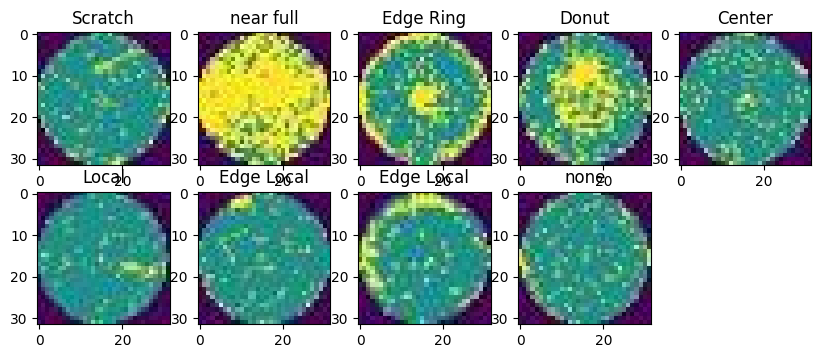

In [56]:
#이미지 출력
import matplotlib.pyplot as plt
idx = 100
plt.figure(figsize=(10,10))
for i in range(9):
 plt.subplot(5,5,i+1)
 plt.title(y_final[i*idx])
 plt.imshow(x_final[i*idx])
plt.show()

#2. 분류 모형 적용

In [82]:
import pandas as pd
X_arr = np.array(x_final).reshape(-1, 32*32*3)
y_arr = np.array(y_final)

X_df = pd.DataFrame(X_arr)
y_df = pd.DataFrame(y_arr)

y_df_ohe = pd.get_dummies(y_df, drop_first=False)

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_df, y_df_ohe, test_size=0.2, random_state=123, stratify=y_df_ohe)

In [84]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
from sklearn.metrics import classification_report
pred = model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        20
           1       0.77      0.48      0.59        21
           2       0.75      0.57      0.65        21
           3       0.79      0.75      0.77        20
           4       0.38      0.60      0.46        20
           5       0.53      0.50      0.51        20
           6       0.86      0.95      0.90        19
           7       0.85      0.85      0.85        20
           8       0.62      0.65      0.63        20

   micro avg       0.66      0.66      0.66       181
   macro avg       0.68      0.66      0.66       181
weighted avg       0.68      0.66      0.66       181
 samples avg       0.66      0.66      0.66       181



In [88]:
np.argmax( pred, axis=1)

array([6, 0, 1, 4, 6, 5, 8, 0, 8, 1, 7, 5, 7, 4, 4, 4, 4, 7, 0, 2, 6, 2,
       4, 6, 1, 1, 3, 4, 7, 4, 2, 3, 3, 0, 6, 3, 3, 0, 6, 5, 4, 4, 6, 5,
       8, 2, 3, 2, 1, 2, 7, 3, 4, 1, 5, 5, 0, 6, 0, 8, 4, 4, 7, 8, 8, 3,
       8, 0, 7, 7, 0, 6, 0, 0, 4, 8, 7, 2, 7, 6, 6, 4, 5, 3, 8, 7, 3, 0,
       1, 8, 4, 0, 8, 8, 8, 5, 4, 5, 0, 2, 4, 5, 2, 6, 8, 7, 2, 8, 5, 1,
       4, 6, 5, 8, 6, 1, 8, 0, 2, 0, 3, 4, 4, 7, 5, 4, 4, 7, 5, 7, 5, 6,
       1, 4, 7, 3, 4, 7, 1, 5, 8, 1, 4, 8, 2, 6, 0, 3, 8, 4, 0, 3, 3, 3,
       4, 4, 7, 0, 6, 4, 4, 6, 7, 3, 3, 1, 2, 5, 2, 6, 0, 6, 4, 2, 5, 3,
       8, 7, 2, 5, 6])

- 사진 촬영

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab import files
import cv2
import numpy as np
import PIL.Image
import io

In [ ]:
# 브라우저에서 웹캠으로 사진 찍기
def take_photo(filename='picture.jpg', quality=0.8):
    js = Javascript('''
        async function takePhoto(quality) {
            const div = document.createElement('div');
            const capture = document.createElement('button');
            capture.textContent = '촬영';
            div.appendChild(capture);

            const video = document.createElement('video');
            video.style.display = 'block';
            const stream = await navigator.mediaDevices.getUserMedia({video: true});

            document.body.appendChild(div);
            div.appendChild(video);
            video.srcObject = stream;
            await video.play();

            // 클릭할 때 사진 캡처
            await new Promise((resolve) => capture.onclick = resolve);

            const canvas = document.createElement('canvas');
            canvas.width = video.videoWidth;
            canvas.height = video.videoHeight;
            canvas.getContext('2d').drawImage(video, 0, 0);
            stream.getTracks().forEach(track => track.stop());
            div.remove();

            return canvas.toDataURL('image/jpeg', quality);
        }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = io.BytesIO(base64.b64decode(data.split(',')[1]))

    # 저장
    image = PIL.Image.open(binary)
    image.save(filename)
    print(f"{filename} 저장 완료!")

    return filename


In [ ]:
# 필요한 모듈 import
import base64

# 사진 찍기 실행
take_photo()

<IPython.core.display.Javascript object>

picture.jpg 저장 완료!


'picture.jpg'

In [ ]:
import cv2
import numpy as np

# OpenCV를 사용해서 이미지 읽어 들이기
im = cv2.imread('picture.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)  #test-car.jpg 업로드 필요
im = cv2.resize(im, (32, 32))
plt.imshow(im) # 이미지 출력하기
plt.show()

In [ ]:
res = model.predict( im.reshape(-1, 32,32,3) )
print(res.max()*100 ,"%의 확률로 ", dirs[res.argmax()], "으로 분류")

#3. CNN 기법

In [144]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
num_classes = 9
in_shape = (32, 32, 3)
epochs = 10

# 데이터를 정규화하기 (flatten을 하지 않음)
X_train_4d = X_train.values.reshape(-1, 32,32,3).astype('float32') / 255
X_test_4d = X_test.values.reshape(-1, 32,32,3).astype('float32') / 255

In [195]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

# 모델 정의하기
def model_train(X_train_4d, y_train, num_classes, in_shape, epochs):
  model = Sequential()
  model.add(Conv2D(64, (3, 3), padding='same', input_shape=in_shape))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.05))

  model.add(Conv2D(128, (3,3), padding='same', name="conv"))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.05))

  model.add(Flatten())
  model.add(Dense(64, activation="relu"))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(num_classes, activation="softmax"))

  #실행 전 GPU 설정
  # 모델 컴파일하기
  model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

  # 학습 실행하기
  hist = model.fit(X_train_4d, y_train,
    batch_size=32, epochs=epochs,
    verbose=1,
    validation_split=0.1)

  return model, hist

# 모델 평가하기
def evaluate(model, X_test_4d, y_test):
  pred = model.predict(X_test_4d)
  score = model.evaluate(X_test_4d, y_test, verbose=1)
  print('정답률=', score[1], 'loss=', score[0])
  return pred

In [196]:
model, history = model_train(X_train_4d, y_train, num_classes, in_shape, epochs)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 194ms/step - accuracy: 0.2202 - loss: 2.0661 - val_accuracy: 0.2329 - val_loss: 1.8678
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.4534 - loss: 1.4683 - val_accuracy: 0.4932 - val_loss: 1.5616
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.5850 - loss: 1.1561 - val_accuracy: 0.5616 - val_loss: 1.2502
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 5s 222ms/step - accuracy: 0.6725 - loss: 0.9498 - val_accuracy: 0.6164 - val_loss: 1.2373
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.6983 - loss: 0.8563 - val_accuracy: 0.6849 - val_loss: 1.0178
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.7552 - loss: 0.7040 - val_accuracy: 0.6301 - val_loss: 1.1595
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - accuracy: 0.7910 - loss: 0.6741 - val_accuracy: 0.7123 - val_loss: 0.8130
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.7905 - loss: 0.5944 - val_accuracy: 0.7123 - val_

In [198]:
pred = evaluate(model, X_test_4d, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.7760 - loss: 0.6923
정답률= 0.7790055274963379 loss= 0.7139888405799866
